In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/machin learn/machin/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df=df.drop(['Name','Ticket','PassengerId'],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
df.duplicated().sum()

np.int64(107)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
import missingno as mano

<Axes: >

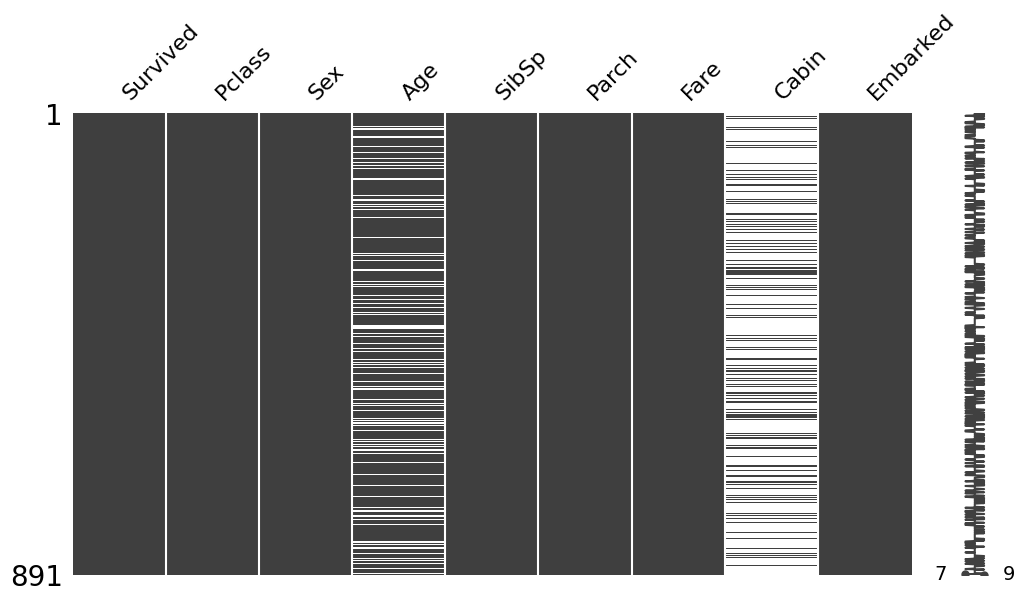

In [ ]:
mano.matrix(df,figsize=(12,6))

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


<Axes: >

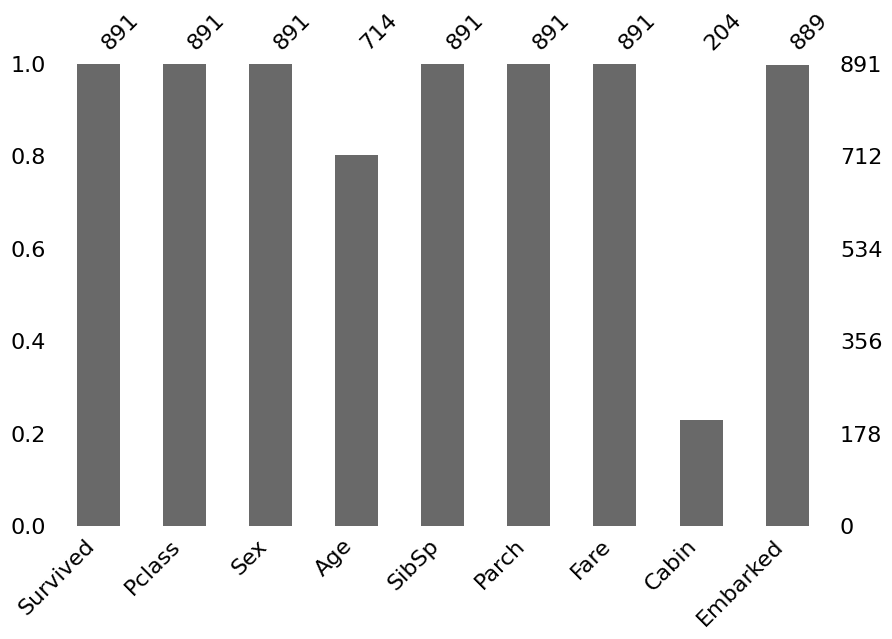

In [ ]:
mano.bar(df,figsize=(10,6))

In [ ]:
missing_value=df.isnull().sum()*100/len(df)
missing_value

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,77.104377
Embarked,0.224467


In [ ]:
df[(df["Age"].isnull()==True)|
           (df["Cabin"].isnull()==True)|
           (df["Embarked"].isnull()==True)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,3,female,26.0,0,0,7.9250,NaN,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
7,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,NaN,S
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
888,0,3,female,NaN,1,2,23.4500,NaN,S


In [ ]:
df.shape

(891, 9)

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [ ]:
# Extract deck letter (first character of the first cabin, if available)
df['CabinDeck'] = df['Cabin'].astype(str).str[0]


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinDeck
0,0,3,male,22.0,1,0,7.2500,NaN,S,n
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,n
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,n


In [ ]:
df['CabinDeck'].value_counts()

,count
CabinDeck,
n,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [ ]:
df['CabinDeck'] = df['CabinDeck'].replace('n', 'U')

In [ ]:
df['CabinDeck'].value_counts()

,count
CabinDeck,
U,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinDeck
0,0,3,male,22.0,1,0,7.2500,NaN,S,U
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,U
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,U


In [ ]:
df=df.drop('Cabin',axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,0,3,male,22.0,1,0,7.2500,S,U
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,U
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,U


In [ ]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(889, 9)

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,0,0,3,male,22.0,1,0,7.2500,S,U
1,1,1,1,female,38.0,1,0,71.2833,C,C
2,2,1,3,female,26.0,0,0,7.9250,S,U
3,3,1,1,female,35.0,1,0,53.1000,S,C
4,4,0,3,male,35.0,0,0,8.0500,S,U


In [ ]:
categorical = df.select_dtypes(include=object).columns.to_list()

In [ ]:
categorical

['Sex', 'Embarked', 'CabinDeck']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col].astype(str))  # Encode the values of each column

In [ ]:
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,0,0,3,1,22.0,1,0,7.2500,2,8
1,1,1,1,0,38.0,1,0,71.2833,0,2
2,2,1,3,0,26.0,0,0,7.9250,2,8
3,3,1,1,0,35.0,1,0,53.1000,2,2
4,4,0,3,1,35.0,0,0,8.0500,2,8


In [ ]:
df = df.drop('index',axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,0,3,1,22.0,1,0,7.2500,2,8
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,8
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,8


In [ ]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  # If you're splitting data


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = LogisticRegression()
model1 = RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)
model1.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)
y_pred1 = model1.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score1 = accuracy_score(y_test,y_pred1)

In [ ]:
score,score1

(0.7802690582959642, 0.7802690582959642)

In [ ]:
scores = []
scores1 = []
for i in range(1000):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=i)
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)
  model = LogisticRegression()
  model1 = RandomForestClassifier()
  model.fit(x_train,y_train)
  model1.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  y_pred1 = model1.predict(x_test)
  score = accuracy_score(y_test,y_pred)
  score1 = accuracy_score(y_test,y_pred1)
  scores.append(score)
  scores1.append(score1)

In [ ]:
value = np.argmax(scores)
value1 = np.argmax(scores1)
score = scores[value]
score1 = scores1[value1]
print(f"Value accuracy : {value},{score} Value accuracy : {value1} , {score1}")

Value accuracy : 18,0.8609865470852018 Value accuracy : 739 , 0.9013452914798207


In [ ]:
def SurvivedPeople(input_data,model):
  input_array = np.asarray(input_data).reshape(1,-1)
  prediction = model.predict(input_array)[0]
  return "Survived" if prediction == 1 else "Not Survived"

In [ ]:
# Get user input as comma-separated values
user_input = input("Enter 8 values separated by space (Pclass	Sex	Age	SibSp	Parch	Fare	Embarked	CabinDeck): ")

# Convert to float tuple
user_input = tuple(map(float, user_input.split(' ')))

# Make prediction
result = SurvivedPeople(user_input, model)
print("Prediction:", result)


Enter 8 values separated by commas (Pclass	Sex	Age	SibSp	Parch	Fare	Embarked	CabinDeck): 3 1 22.0 1 0 7.2500 2 8
Prediction: Not Survived


In [ ]:
3	1	22.0	1	0	7.2500	2	8